# Data Engineering with Python

## Description

Data science teams encounter many varieties of problems day to day, ranging from data collection and cleaning, to model building and implementation, to delivering a finished product or presenting important insights. In large, well-developed data teams these roles might be distinguished between different people or even have their own dedicated teams. But in smaller more integrated teams, a data scientist will have to be able to seemlessly jump between these functions.

Regardless of size, one of the biggest challenges in data science is preparing data to the workflow. This is called Data Engineering. This course focuses on how you bring data from databases and the internet into your own flow.

## Learning Objectives

By the end of this course you should
- Distinguish between the different tasks and challenges facing data teams
- Retrieve and process data from large databases using *SQL* and *Apache Spark*
- Preprocess data and engineer important features 
- Format data so that it will be of maximum use further down the data pipeline

## Courses

- Exploratory Data Analysis Course
    - Market text: You've been told what is in your database. You have the documentation that explains each variable. But how do you get a feel for what is in a large dataset? This course will show you how to take a peak into your data. You will learn how to understand what is in each variable, and how to see if there are red flags. You will also learn how to visualise your data to share it with you others.
    - Obejectives: Understand data types and count Null entries, Perform descriptive analysis based on data type for single variable, visualise data appropriately by datatype for single variable, describe and visualise pairs of variables.
    - Prerequisites: Some Knowledge of Pandas and MatPlotLib, e.g. Intermediate Python for Data Science 
- Data Cleaning in Python *
- Feature Engineering
    - Market text: While model fitting gets a lot more attention, there are many situations where proper feature selection and extraction can vastly improve your predictive power. This course will teach you to efficiently perform common feature engineering tasks, and grant you the insight to know when to use these techniques.
    - Obejectives: Transform and Impute data with Pandas and NumPy, Select most important variables with advanced statistics techniques like ANOVA and PCA, Prepare data for models with normalisation and dummy variables, Engineer features using NumPy and SciKit Learn.
    - Prerequistes: Previous courses in track as well as Intro to Python and Intermediate Python for DataScience.
- Intro to to SQL for data science **
    - SQL is almost synonymous with data engineering. Understanding the basics of SQL empower data scientists to talk about data engineering: the language and ideas in Pandas and DplyR use SQL.
- Intro to PySpark *
    - Apache Spark is one of the most common ways to interact with SQL, so it is important 
- Building Recommendation Engines *
    - This is something like a *capstone*: This course will help illustrate the power data engineering can have to improve model building.

\* Pre-existing

** Part of the Python for Data Science course


## Course Outline for *Feature Engineering with Python*

### Market text
 While model fitting gets a lot more attention, there are many situations where proper feature selection and extraction can vastly improve your predictive power. This course will teach you to efficiently perform common feature engineering tasks, and grant you the insight to know when to use these techniques.
 
### Obejectives
Transform and Impute data with Pandas and NumPy, Select most important variables with advanced statistics techniques like ANOVA and PCA, Prepare data for models with normalisation and dummy variables, Engineer features using NumPy and SciKit Learn.

### Prerequisites
Previous courses in track as well as Intro to Python and Intermediate Python for DataScience.

### Course d/dx
(For instructor) When creating this course, keep in mind that the target student has a passing understanding of pandas and numpy, but maybe little to no experience with statistics and SciKitLearn, so take time
- to explain the concepts of outliers and variance and illustrate these concepts with data and coding exercises.
- to explain the language/grammer of SciKit learn model objects, in particular fit, transfrom, and fit_transform. 

We want to teach these students to have the following concrete skills
- Transform variables with pandas (bin, impute, tokenize)
- Evaluate when and how to cut outliers
- Evaluate which variables are predictive using Variance
- Normalise/scale data
- Feature engineer using PCA

We also want to teach the students the soft skills of understanding when these techniques will improve prediction, and how to explain their process.




## Outline 

1. Broadcasting Functions with Pandas
    - `cut` function and binning
    - `apply` and `transform` methods
    - missing values
    - get-dummies and tokenizing
2. Statistical Techniques
    - outliers
    - ANOVA
    - fit and predict methods
3. Normalising and Scaling with SciKitLearn
    - fit, tranform and fit_transform methods
    - standard scalar
    - L2 and L1 normalising
    - Principal Component Analysis
    - Pipelines for preprocessing
4. Preparing data for prediction
    - get-dummies for multiclass classification problems
    - Using Variance to select variables
    - Using PCA to preprocess variables
    - Normalising to improve accuracy

In [65]:
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA

In [66]:
heart_disease = pd.read_csv('heart.csv')
heart_pca = PCA()
heart_pca.fit(heart_disease.iloc[:,0:14])
heart_pca_transform = pd.DataFrame(heart_pca.transform(heart_disease.iloc[:,0:14]))
id_vars = heart_pca_transform.columns
heart_pca_transform["target"] = heart_disease["target"]
heart_pca_transform = heart_pca_transform.melt(id_vars = "target")

In [67]:
heart_pca_transform.head()

,target,variable,value
0,1,0,-12.267726
1,1,0,2.689662
2,1,0,-42.950640
3,1,0,-10.945206
4,1,0,106.978583


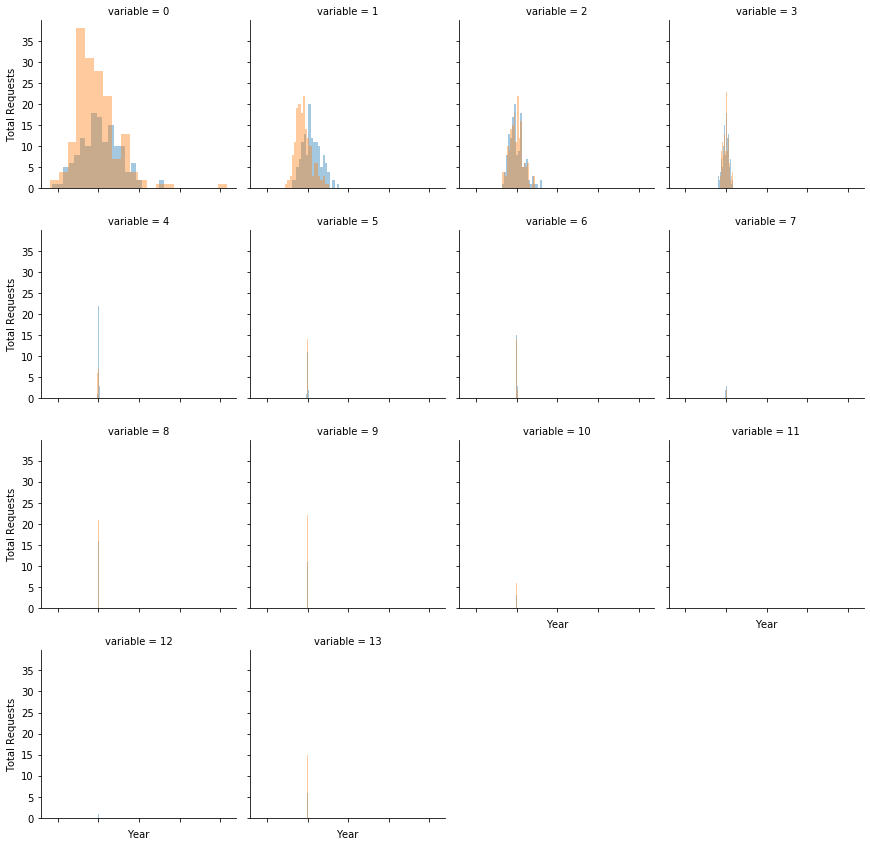

In [75]:
# Initialise facet grid
g = sns.FacetGrid(heart_pca_transform,
                 col = "variable", hue = "target", col_wrap=4) 
#
# Map lineplot
g = g.map(sns.distplot, "value", bins = 20, kde = False
                  )
g = g.set_xticklabels(rotation = 45)
#
# Relabel the axes
g = g.set_ylabels("Total Requests")
g = g.set_xlabels("Year")

## Question Prompt

Dimension reduction is the learning process by which we take a high dimensional data set (i.e. a data set with a lot of columns) and output a data set with a few variables which still has the important structures. 

Principal Component analysis is one of the most popular techniques for dimension reduction. This is in part because it is effective for visualising higher dimensional data sets.

We have loaded the [UCI Heart Disease Data](https://www.kaggle.com/ronitf/heart-disease-uci) and performed PCA. This data contains 14 of the most commonly tracked variables along with  a target variable (1 indicates the presence of heart disease, 0 indicates none). To the right is a facet wrapped list of histograms of the each of the Principal Components colored by the target variable.

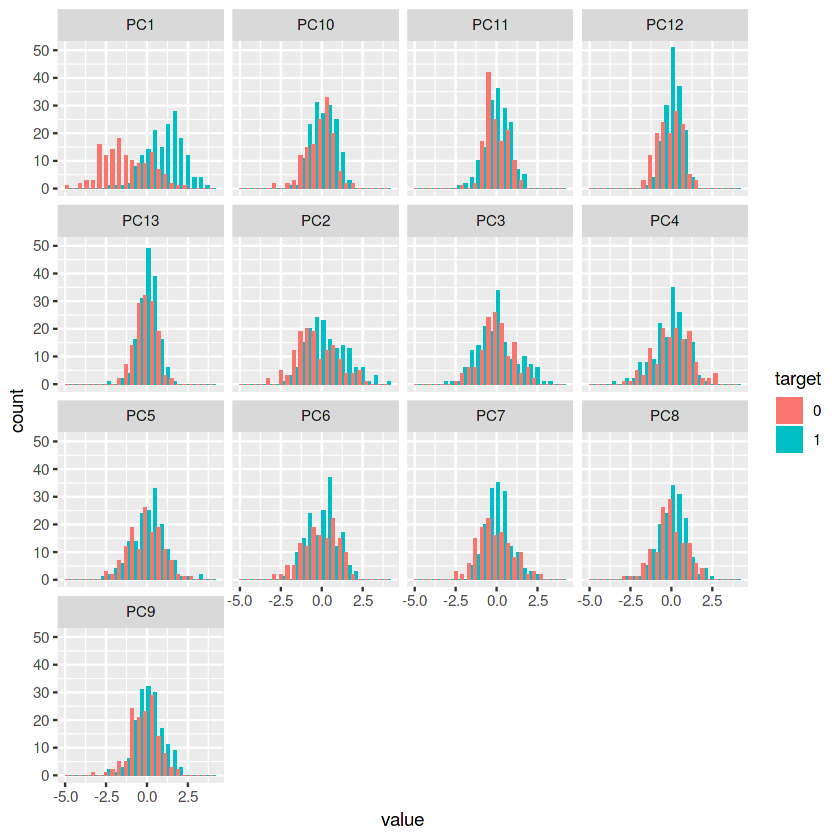

### Question

Which of the following statements is true:

1. All of the components are equally predictive of the presence of heart disease.
    - (entering this answer will result in the response: "While almost all of the PCs have both red and blue histograms with similar means and standard deviations, there is one which does not")
2. The first PC does the best job at predicting heart disease
    - (Correct answer: "PC1 is the only PC which has significant separation of the distribution of the blue and red variables.")
3. The heights of the peaks is the most significant factor in prediction
    - (Response: "The height of a peak in a histogram indicates that there are more variables at a specific node. While height of a peak is important in chosing predictive variables with ANOVA, the location of the peaks will be more significant here.")
4. You can't use PCA to improve prediction for this data
    - (Response: "While this will not guarantee correct predictions, we can see that there are some variable which distinguish the distributions of the red and the blue.")
    
## Exercise Prompt

We are going to use our Pandas skills to learn which variables are most important from our Principal Components. We saw in the previous exercise, that the first PC gave us the best separation between the values of the target (red and blue), so we shall focus on that. In this exercise we shall discover which variables contribute the most to this component.

Once we have fit a `PCA` object, it stores the components in the `components_` attribute as a `numpy` array, with the components stored as columns. For example, `pca.components_[:,5]` is the 6th component. (Remember Python is 0-indexed!) The underscore at the end of the attribute is simply to avoid some naming conflict. If in the future you are confused by what is in a class, then you can use the `dir` function. Go ahead, try `dir(heart_pca)` in the kernel!

The *magnitude* of the the variable is how important it is to the component, so a large negative value is as important as a large positive value. So we shall use our transformation techniques to `apply` the absolute value to our newly created DataFrame.

The data is loaded in as `heart_disease`, and `heart_pca` has already been fit for you.

### Instructions:
-  `heart_df` is initialized as an empty data frame, create a column called `Variable` which has the column names of the first 14 columns of `heart_disease`
- Create a column of `heart_df` called `PC1` which has the first principal component of `heart_pca`.
- `apply` the `np.abs` function to the `PC1` column of `heart_df` to get the magnitudes of that column.
- Examine the output graph to see 

### Hint
- Remember that the column names of a dataframe are stored in the `columns` attribute.
- `heart_pca.components_[:,0]` is the first principal component
- use the `apply` method on `heart["PC1"]` to apply the function `np.abs`.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

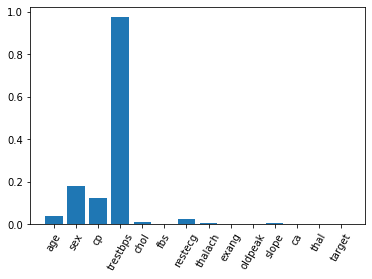

In [48]:
# Imported packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# This initializes the dataframe: heart_df
heart_df = pd.DataFrame()
#
# Fill in the column Variables with the first 14 column names of heart_disease
heart_df["Variables"] = heart_disease.columns[0:14]
#
# Fill in the column PC1 with the first PC from heart_pca
heart_df["PC1"] = heart_pca.components_[:,0]
#
#
heart_df["PC1"] = heart_df["PC1"].apply(np.abs)
#

plt.bar(heart_df.Variables, height = heart_df.PC1)
plt.xticks(rotation = 60)

## Yay!

You can see the `trestbps` (which is resting bloodpressure) contributes the most to the first PC!